# Technical write-up+code

## Methods

In this section, I am going to use the following features (educational, economial and geological factors) and use the mental health disorder (Use eating disorder here) as a target varible for classfication using a decision tree and random forest algorithm.

In general, a a decision Trees (DT) are a type of model used in machine learning that mimic human decision-making processes. Imagine you're trying to decide what to wear. You might look at the weather (a feature) and choose accordingly. A decision tree does something similar with data: it makes a series of choices based on the features to reach a conclusion, like deciding if an email is spam. It's like a flowchart – starting with a question about the data, it branches out until it reaches an answer.

Random Forests (RF) build on decision trees. If a decision tree is like a single advisor making a decision, a random forest is like a committee. It creates multiple decision trees, each with slightly different perspectives, and then combines their votes to make a final decision. This helps in getting a more balanced and less biased result, as it avoids over-relying on a single perspective.

## Data
The data I am using here is preprocessed (cleaned,feature selected and converted to categorical data) in the section `Naive Bayes' and saved as `mental_health_binarized.csv`in the Data_cleand folder. 

In [242]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [252]:
df_mental_health=pd.read_csv('./Data_cleaned/mental_health_DR.csv')
# Compute the distribution of class labels whicih is eating disorder
df_mental_health.head()
class_distribution = df_mental_health['Eating disorders (%)'].value_counts(normalize=True)

# Output the distribution
print(class_distribution)

# Visualize the distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.show()

,Eating disorders (%),Income group,average_learning_Adjusted_of_school,Continent,GDP_per_capita
0,Low,1,4.957542,1,3309.844
1,Low,1,4.957542,1,3309.844
2,Low,1,4.957542,1,3309.844
3,Low,1,4.957542,1,3309.844
4,Low,1,4.957542,1,3309.844


## Baseline model for comparison
To understand the accuracy of the model, I created a baseline model to compare it to. A baseline model in machine learning and data science serves as a simple, often basic reference point for comparing the performance of more complex models. 

In [244]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Prepare the data
X = df_mental_health.drop('Income group', axis=1)
y = df_mental_health['Income group']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a random classifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Evaluate the classifier
y_pred = dummy.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

        High income       0.29      0.27      0.28       296
         Low income       0.15      0.15      0.15       137
Lower middle income       0.31      0.31      0.31       284
Upper middle income       0.26      0.28      0.27       258

           accuracy                           0.27       975
          macro avg       0.25      0.25      0.25       975
       weighted avg       0.27      0.27      0.27       975



## Model tuning
Decision Trees:

    Tree_depth  train_accuracy_score  test_accuracy_score
0            1              0.497819             0.490256
1            2              0.605851             0.577436
2            3              0.721324             0.687179
3            4              0.778548             0.762051
4            5              0.796254             0.764103
5            6              0.874006             0.865641
6            7              0.913780             0.901538
7            8              0.940210             0.935385
8            9              0.969720             0.958974
9           10              0.982807             0.964103
10          11              0.991019             0.978462
11          12              0.996664             0.983590
12          13              0.998460             0.985641
13          14              0.999230             0.985641
14          15              0.999743             0.985641
15          16              1.000000             0.990769
16          17

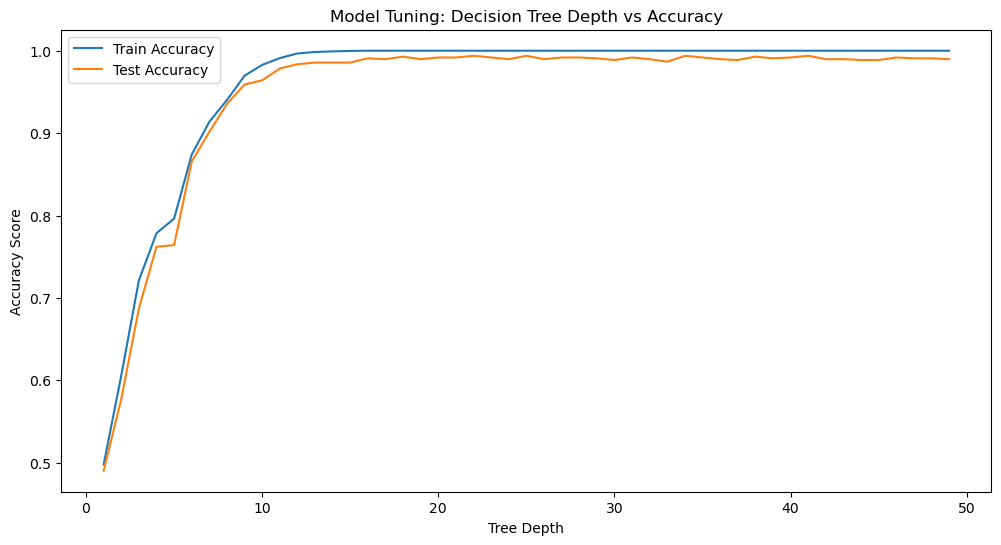

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load and preprocess your data
df_mental_health.columns
X = df_mental_health.drop(['Income group','Economy','Year','Code','Continent','GDP(2022)'],axis= 1) 
y = df_mental_health['Income group']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_results = []
train_results = []

for num_layer in range(1, 50):
    # Include TfidfVectorizer in the pipeline
    model = Pipeline([
        ('dt', DecisionTreeClassifier(max_depth=num_layer))
    ])
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    test_results.append([num_layer, accuracy_score(y_test, y_test_pred)])
    train_results.append([num_layer, accuracy_score(y_train, y_train_pred)])

# Create DataFrames for visualization
tuning_train_df = pd.DataFrame(train_results, columns=["Tree_depth", "train_accuracy_score"])
tuning_test_df = pd.DataFrame(test_results, columns=["Tree_depth", "test_accuracy_score"])
# print(tuning_train_df)
# print(tuning_test_df)
#merge two dataframes
tuning_df = pd.merge(tuning_train_df, tuning_test_df, on='Tree_depth')
print(tuning_df)
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(tuning_train_df['Tree_depth'], tuning_train_df['train_accuracy_score'], label='Train Accuracy')
plt.plot(tuning_test_df['Tree_depth'], tuning_test_df['test_accuracy_score'], label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Score')
plt.title('Model Tuning: Decision Tree Depth vs Accuracy')
plt.legend()
plt.show()


Training dataset
Accuracy:  100.0
Number of mislabeled points:  0
Testing dataset
Accuracy:  98.97435897435898
Number of mislabeled points:  10


[Text(0.5, 1.0, 'Accuracy of model for training vs test sets')]

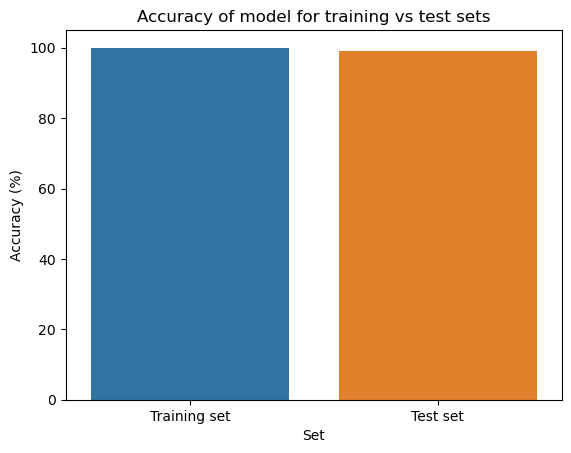

In [246]:
# TEST ACCURACY
# Training dataset
y_train_pred = model.predict(X_train)
print("Training dataset")
print("Accuracy: ", accuracy_score(y_train, y_train_pred) * 100) 
print("Number of mislabeled points: ", (y_train != y_train_pred).sum()) 

# Testing dataset
y_test_pred = model.predict(X_test)
print("Testing dataset")
print("Accuracy: ", accuracy_score(y_test, y_test_pred)*100) 
print("Number of mislabeled points: ", (y_test != y_test_pred).sum()) 

# Plot
model_accuracies = pd.DataFrame({'Set':['Training set','Test set'], 'Accuracy (%)': [accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred)*100]})
sns.barplot(data=model_accuracies, x="Set", y="Accuracy (%)").set(title = 'Accuracy of model for training vs test sets' )

Random Forests:

In [247]:
from sklearn.tree import DecisionTreeClassifier

# X = df_mental_health.drop(['Income group','Economy','Year','Code','Continent','GDP(2022)'],axis= 1) 
# y = df_mental_health['Income group'] 
 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# # Set the parameters by cross-validation
# tuned_parameters = {
#     'rf__n_estimators': [10, 20, 30],
#     'rf__max_depth': [None, 10, 20, 30],
#     'rf__min_samples_split': [2, 5, 10],
#     'rf__min_samples_leaf': [1, 2, 4],
#     'rf__max_features': ['sqrt', 'log2']
# }

# # Create a new pipeline with a RandomForestClassifier
# model_rf = Pipeline([
#     ('rf', RandomForestClassifier(random_state=42))
# ])

# # Use GridSearchCV to tune the model
# clf = GridSearchCV(model_rf, tuned_parameters, cv=5, scoring='accuracy')
# clf.fit(X_train, y_train)

# print("Best parameters set found on development set:")
# print(clf.best_params_)

In [248]:
# Set the best parameters in the RandomForestClassifier
best_params_rf = {
    'n_estimators': 38, 
    'max_depth': None,
    'min_samples_leaf': 1, 
    'min_samples_split': 5, 
    'max_features': 'log2'
}

# Create the pipeline with TfidfVectorizer and RandomForestClassifier with the best parameters
model_rf = Pipeline([
    ('rf', RandomForestClassifier(**best_params_rf, random_state=42))
])

# Train the model with the best parameters on the training data
model_rf.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# Calculate the accuracy scores for the training and test sets
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the accuracy scores
print(f"Random Forest training accuracy with best parameters: {train_accuracy_rf * 100:.2f}%")
print(f"Random Forest testing accuracy with best parameters: {test_accuracy_rf * 100:.2f}%")


Random Forest training accuracy with best parameters: 100.00%
Random Forest testing accuracy with best parameters: 100.00%


In [249]:
# print(model.named_steps['dt'].classes_)
# # The first element is what '0' represents, and the second element is what '1' represents.

## Final results
The decesion tree has an accurcay of  0.999743  on the traning dataset and an accurcy of 0.990769 on the test dataset when the num_layer is set to 15. 

Initially, as the tree depth increases, there's an improvement in both training and testing accuracy. However, beyond a certain point, the increase in training accuracy to 1  does not translate to an improvement in testing accuracy. This suggests that the optimal tree depth for this model, where it balances learning from the training data without losing generalizability.

In summary, while a high training accuracy score may seem positive at first glance, it can be indicative of overfitting when it is not accompanied by a corresponding high test accuracy.

The random forest has an accurcay of 1 on the traning dataset and an accurcy of 1 on the test dataset.

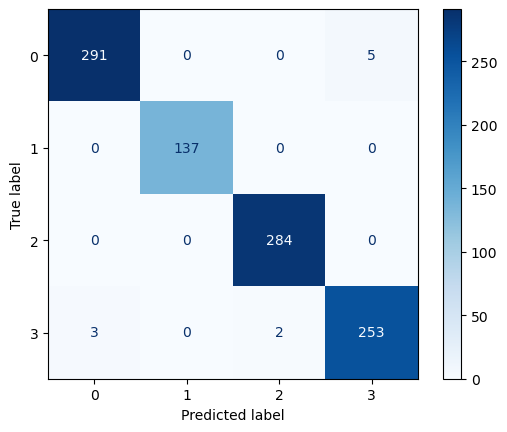

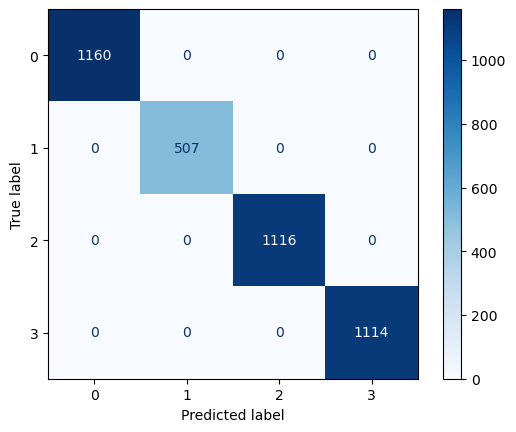

In [250]:
# confusion matrix(test set)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate the confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
cm1 = confusion_matrix(y_train, model.predict(X_train))
# Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap="Blues")
disp1.plot(cmap="Blues")

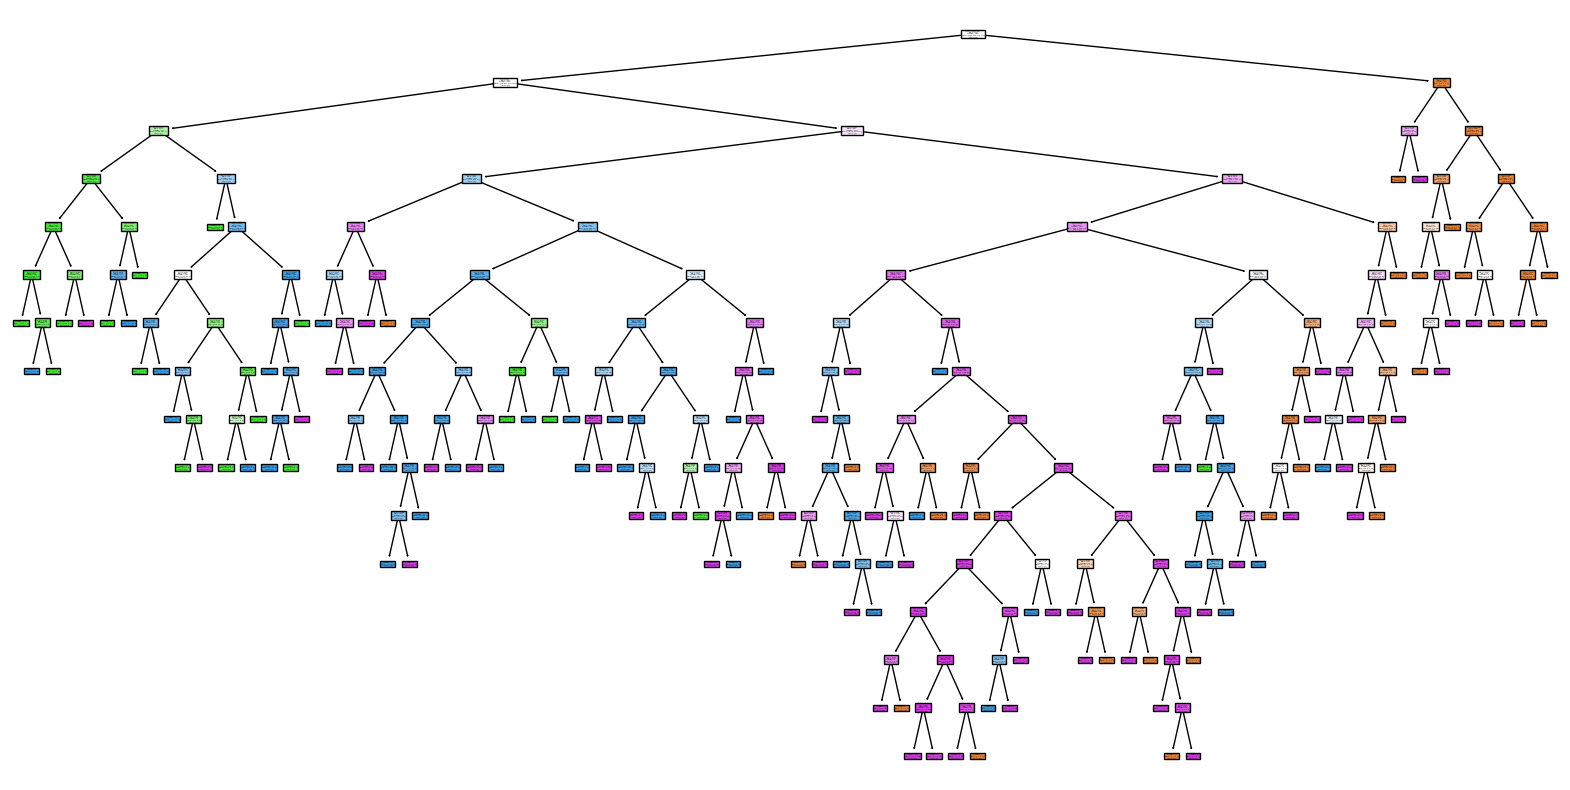

In [251]:
#decesion tree visualization
from sklearn.tree import plot_tree

# Fit the model with desired tree depth(3)
desired_depth = 15
model = Pipeline([
    ('dt', DecisionTreeClassifier(max_depth=desired_depth))
])
model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(model.named_steps['dt'], filled=True, class_names=True)
plt.show()

# Conclusions

In conclusion, I think this decision tree model is a high quality model because it has the relatively high accuracy scores for both training and test sets.

We can see how well a model can distinguish between health issues related to the mind, like anxiety or depression (mental health problems), and those related to the body, such as a broken arm or a cold (physical health). 

From the matrix, we see that when it is given symptoms and guesses they're related to mental health, it's correct 15 times but also makes a mistake 7 times, confusing physical symptoms for mental ones. Conversely, when it guesses symptoms are related to physical health, it's spot on 13 times, but it still slips up 3 times, mislabeling mental health symptoms as physical.

It matters because it's about getting the right help when we need it.  If we're feeling down, we don't want an app to suggest, what we need is just a good night's sleep or to relax. Similarly, if our body is aching because of an underlying physical condition, being advised to seek mental health support wouldn't be the most helpful first step; The hiccips here suggests it's still learning and needs more information to make better guesses(we may need more traning data and testing data), Perhaps it's not yet good at picking up on the subtleties that distinguish a cough from stress from a cough from a cold.

In the future, there's a lot we can do to get better at this. We can feed the model a wider variety of examples so it can learn the full range of symptoms for both mental and physical health issues. Or, we can get clever and help the model understand each person's unique health patterns over time, making its predictions more personalized and accurate.